In [ ]:
import pandas as pd 

csv_file= pd.read_csv('/content/fyp_reviews_dataset.csv')
csv_file.head()

,id,reviews_rating,reviews_text
0,1,1.0,NaN
1,1,5.0,NaN
2,1,5.0,NaN
3,1,1.0,NaN
4,1,5.0,NaN


In [ ]:
#download vader
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#import sid for polarity score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#eg1
a = 'Good Keyboard and addition to the Surface Pro platform if you desire fingerprint scanner access. For my use the Surface Pro Keyboard without fingerprint scanner works just fine.'
sid.polarity_scores(a)

{'compound': 0.7506, 'neg': 0.0, 'neu': 0.772, 'pos': 0.228}

In [ ]:
#eg2
a = 'very complicated'
sid.polarity_scores(a)

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
#eg3
a = 'tough getting it to work on surface pro 3, but once it worked the bugs out I love the spacing and larger touchpad'
sid.polarity_scores(a)

{'compound': 0.7615, 'neg': 0.046, 'neu': 0.739, 'pos': 0.214}

In [ ]:
#preprocessing 
#checking null 5->2->0
csv_file['reviews_text'].isnull().sum()

133337

In [ ]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142715 entries, 0 to 142714
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              142715 non-null  int64  
 1   reviews_rating  140712 non-null  float64
 2   reviews_text    9378 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
csv_file = csv_file.dropna()

In [ ]:
#creating reviews_score col 
csv_file['score']= csv_file['reviews_text'].apply(lambda reviews_text: sid.polarity_scores(str(reviews_text)))
csv_file.head(5)

,id,reviews_rating,reviews_text,score
127792,894,5.0,The Red series by Western Digital has been fan...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
127793,894,5.0,I purchased 3 of these to use in. Qnap nas. I ...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."
127794,894,5.0,Great with my Synology box!!! Some of the best...,"{'neg': 0.067, 'neu': 0.479, 'pos': 0.454, 'co..."
127795,894,5.0,I am very happy with this product. I would cer...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp..."
127796,894,5.0,I prefer multiple small drives instead of one ...,"{'neg': 0.195, 'neu': 0.729, 'pos': 0.075, 'co..."


In [ ]:
#creating reviews_score col
csv_file['compound_score']= csv_file['score'].apply(lambda score_dict: score_dict['compound'])
csv_file.head(5)


,id,reviews_rating,reviews_text,score,compound_score
127792,894,5.0,The Red series by Western Digital has been fan...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.9128
127793,894,5.0,I purchased 3 of these to use in. Qnap nas. I ...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.9510
127794,894,5.0,Great with my Synology box!!! Some of the best...,"{'neg': 0.067, 'neu': 0.479, 'pos': 0.454, 'co...",0.8770
127795,894,5.0,I am very happy with this product. I would cer...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7501
127796,894,5.0,I prefer multiple small drives instead of one ...,"{'neg': 0.195, 'neu': 0.729, 'pos': 0.075, 'co...",-0.6453


In [ ]:
#creating reviews_score col
# print('kid' if age < 13 else 'teenager' if age < 18 else 'adult')
csv_file['target']= csv_file['compound_score'].apply(lambda sc: 'positive' if sc>= 0.05 else 'negetive' if sc <= 0.05 else 'neutral')
csv_file.head(5)

,id,reviews_rating,reviews_text,score,compound_score,target
127792,894,5.0,The Red series by Western Digital has been fan...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.9128,positive
127793,894,5.0,I purchased 3 of these to use in. Qnap nas. I ...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.9510,positive
127794,894,5.0,Great with my Synology box!!! Some of the best...,"{'neg': 0.067, 'neu': 0.479, 'pos': 0.454, 'co...",0.8770,positive
127795,894,5.0,I am very happy with this product. I would cer...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7501,positive
127796,894,5.0,I prefer multiple small drives instead of one ...,"{'neg': 0.195, 'neu': 0.729, 'pos': 0.075, 'co...",-0.6453,negetive


In [ ]:
csv_file

,id,reviews_rating,reviews_text,score,compound_score,target
127792,894,5.0,The Red series by Western Digital has been fan...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.9128,positive
127793,894,5.0,I purchased 3 of these to use in. Qnap nas. I ...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.9510,positive
127794,894,5.0,Great with my Synology box!!! Some of the best...,"{'neg': 0.067, 'neu': 0.479, 'pos': 0.454, 'co...",0.8770,positive
127795,894,5.0,I am very happy with this product. I would cer...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7501,positive
127796,894,5.0,I prefer multiple small drives instead of one ...,"{'neg': 0.195, 'neu': 0.729, 'pos': 0.075, 'co...",-0.6453,negetive
...,...,...,...,...,...,...
142620,998,5.0,We have had Dell computers before and have alw...,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",0.4927,positive
142621,998,4.0,It's a good PC I would recommend this to a Fri...,"{'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'comp...",0.8225,positive
142622,998,5.0,I waited a good half hour for a salesman but i...,"{'neg': 0.019, 'neu': 0.711, 'pos': 0.27, 'com...",0.9959,positive
142623,998,5.0,The XPS series is well worth the extra money s...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.4588,positive


In [ ]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#data exploration
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 20
plot_size[1] = 18
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


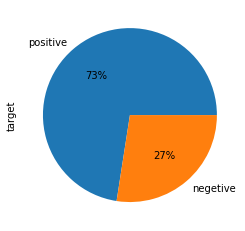

In [ ]:
data = csv_file.loc[csv_file['id'] == 894]
data.target.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
data.target.value_counts()

positive    37
negetive    14
Name: target, dtype: int64

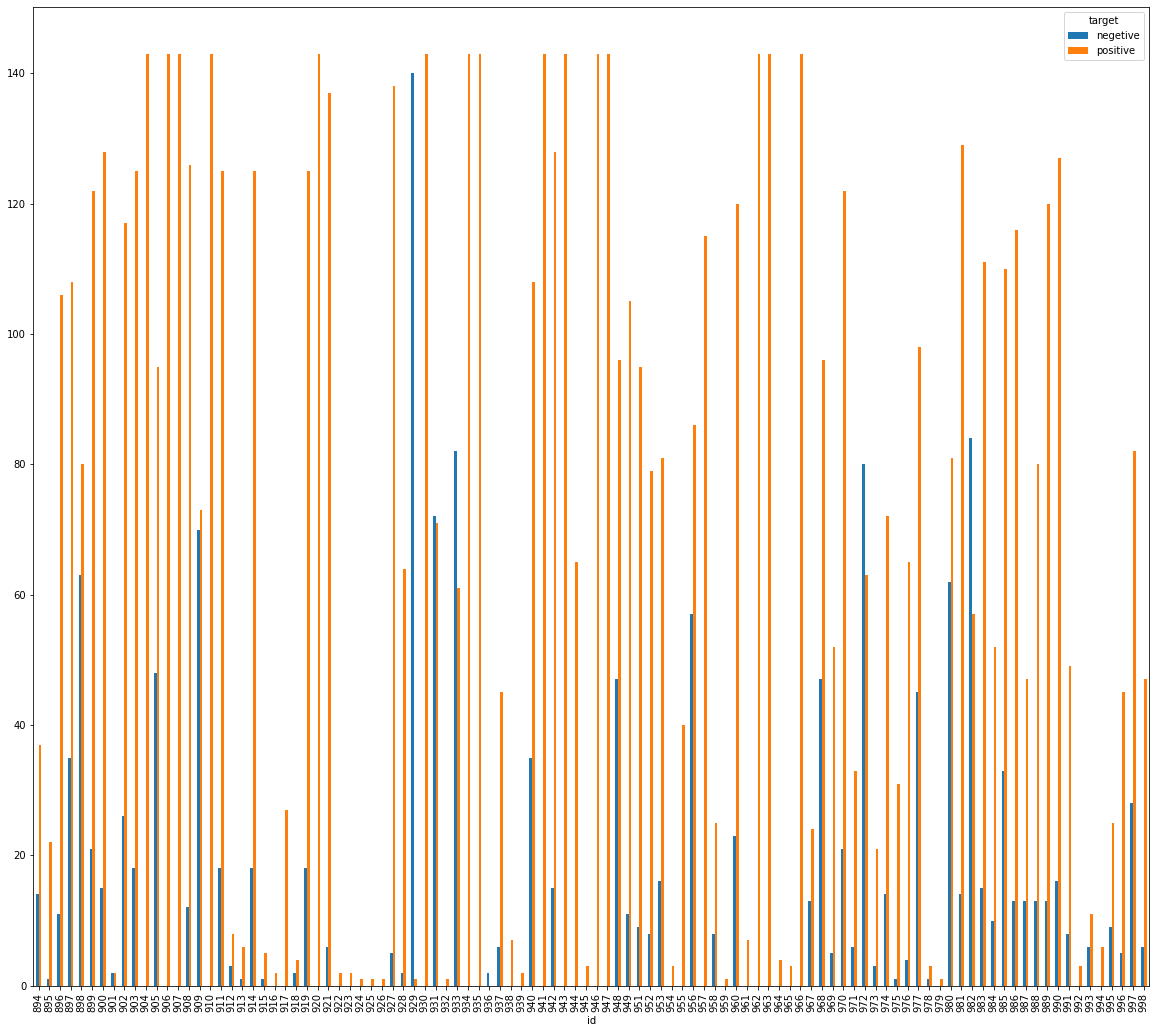

In [ ]:
dataset_sentiment = csv_file.groupby(['id', 'target']).target.count().unstack()
dataset_sentiment.plot(kind='bar')

In [ ]:
csv_file= csv_file.drop(columns=['score','compound_score'], axis=1)

In [ ]:
csv_file.to_csv('reviews_labeled.csv',index=False)

In [ ]:
from google.colab import files
files.download('reviews_labeled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>